In [1]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras import optimizers

import time 

Using TensorFlow backend.


### Data Processing

In [2]:
df = pd.read_csv('../data/num_data.csv')

In [3]:
dataset = df[:1000]

In [4]:
dataset.shape

(1000, 16)

In [5]:
# Useful functions
def plot_predictions(test, predicted):
    plt.figure(figsize=(30, 15));

    plt.plot(test, color='red', alpha=0.5, label='Actual PM2.5 Concentration',)
    plt.plot(predicted, color='blue', alpha=0.5, label='Predicted PM2.5 Concentation')
    plt.title('PM2.5 Concentration Prediction')
    plt.xlabel('Time')
    plt.ylabel('PM2.5  Concentration')
    plt.legend()
    plt.show()
    

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse

In [6]:
data_size = dataset.shape[0]
train_size=int(data_size * 0.6)
test_size = 100
valid_size = data_size - train_size - test_size

test_next_day = [12, 24, 48]

In [7]:
training_set = dataset[:train_size].iloc[:,4:16].values
valid_set = dataset[train_size:train_size+valid_size].iloc[:,4:16].values
test_set = dataset[data_size-test_size:].iloc[:,4:16].values

In [8]:
y = dataset.iloc[:,4].values
y = y.reshape(-1,1)

y.shape

(1000, 1)

In [9]:
# Scaling the dataset
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
valid_set_scaled = sc.fit_transform(valid_set)
test_set_scaled = sc.fit_transform(test_set)

sc_y = MinMaxScaler(feature_range=(0,1))
y_scaled = sc_y.fit_transform(y)

In [10]:
X_train = []
y_train = []
seq_len = 24 # the length of timesteps in time-series analysis
for i in range(seq_len, train_size):
    X_train.append(training_set_scaled[i-seq_len:i,:])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_valid = []
y_valid = []

for i in range(seq_len, valid_size):
    X_valid.append(valid_set_scaled[i-seq_len:i,:])
    y_valid.append(valid_set_scaled[i,0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [12]:
X_test = []
y_test = []

for i in range(seq_len, test_size):
    X_test.append(test_set_scaled[i-seq_len:i,:])
    y_test.append(test_set_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [13]:
X_valid.shape

(276, 24, 12)

In [14]:
y_train.shape

(576,)

In [16]:
GRU_reg = Sequential()
LSTM_reg = Sequential()
GRU_GRU_reg =  Sequential()
GRU_LSTM_reg = Sequential()
LSTM_GRU_reg = Sequential()
LSTM_LSTM_reg = Sequential()

DFS = Sequential()



GRU_reg.add(GRU(units=50, input_shape=(X_train.shape[1],12), activation='tanh'))
# The output layer
GRU_reg.add(Dense(units=1))


LSTM_reg.add(LSTM(units=50, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_reg.add(Dense(units=1))


GRU_GRU_reg.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
GRU_GRU_reg.add(GRU(units=50, activation='tanh'))
GRU_GRU_reg.add(Dense(units=1))


LSTM_LSTM_reg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_LSTM_reg.add(LSTM(units=50, activation='tanh'))
LSTM_LSTM_reg.add(Dense(units=1))


LSTM_GRU_reg.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
LSTM_GRU_reg.add(GRU(units=50, activation='tanh'))
LSTM_GRU_reg.add(Dense(units=1))


GRU_LSTM_reg.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],12), activation='tanh'))
GRU_LSTM_reg.add(LSTM(units=50, activation='tanh'))
GRU_LSTM_reg.add(Dense(units=1))


# Compiling the RNNs
adam = optimizers.Adam(lr=0.01)

GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')
GRU_GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')
LSTM_GRU_reg.compile(optimizer=adam,loss='mean_squared_error')
GRU_LSTM_reg.compile(optimizer=adam,loss='mean_squared_error')

In [17]:
RnnModelDict = {'LSTM': LSTM_reg, 'GRU': GRU_reg, 'LSTM_LSTM': LSTM_LSTM_reg, 'GRU_GRU': GRU_GRU_reg, 
                'LSTM_GRU': LSTM_GRU_reg, 'GRU_LSTM': GRU_LSTM_reg}

X_test_12 = X_test[:12]
y_test_12 = y_test[:12]
X_test_24 = X_test[:24]
y_test_24 = y_test[:24]
X_test_48 = X_test[:48]
y_test_48 = y_test[:48]

rmse_df = pd.DataFrame(columns=['Model', 'train_rmse', 'valid_rmse', '24h_pred_rmse', 'train_time'])

RnnModelDict = {'LSTM_GRU': LSTM_GRU_reg, 'LSTM_LSTM': LSTM_LSTM_reg}

training start for LSTM_GRU

Epoch 1/50
576/576 [==============================] - 1s 2ms/step - loss: 0.0606
Epoch 2/50
576/576 [==============================] - 0s 461us/step - loss: 0.0098
Epoch 3/50
576/576 [==============================] - 0s 456us/step - loss: 0.0060
Epoch 4/50
576/576 [==============================] - 0s 476us/step - loss: 0.0040
Epoch 5/50
576/576 [==============================] - 0s 502us/step - loss: 0.0042
Epoch 6/50
576/576 [==============================] - 0s 474us/step - loss: 0.0032
Epoch 7/50
576/576 [==============================] - 0s 512us/step - loss: 0.0028
Epoch 8/50
576/576 [==============================] - 0s 456us/step - loss: 0.0030
Epoch 9/50
576/576 [==============================] - 0s 451us/step - loss: 0.0029
Epoch 10/50
576/576 [==============================] - 0s 444us/step - loss: 0.0030
Epoch 11/50
576/576 [==============================] - 0s 447us/step - loss: 0.0024
Epoch 12/50
576/576 [==============================] - 0s 

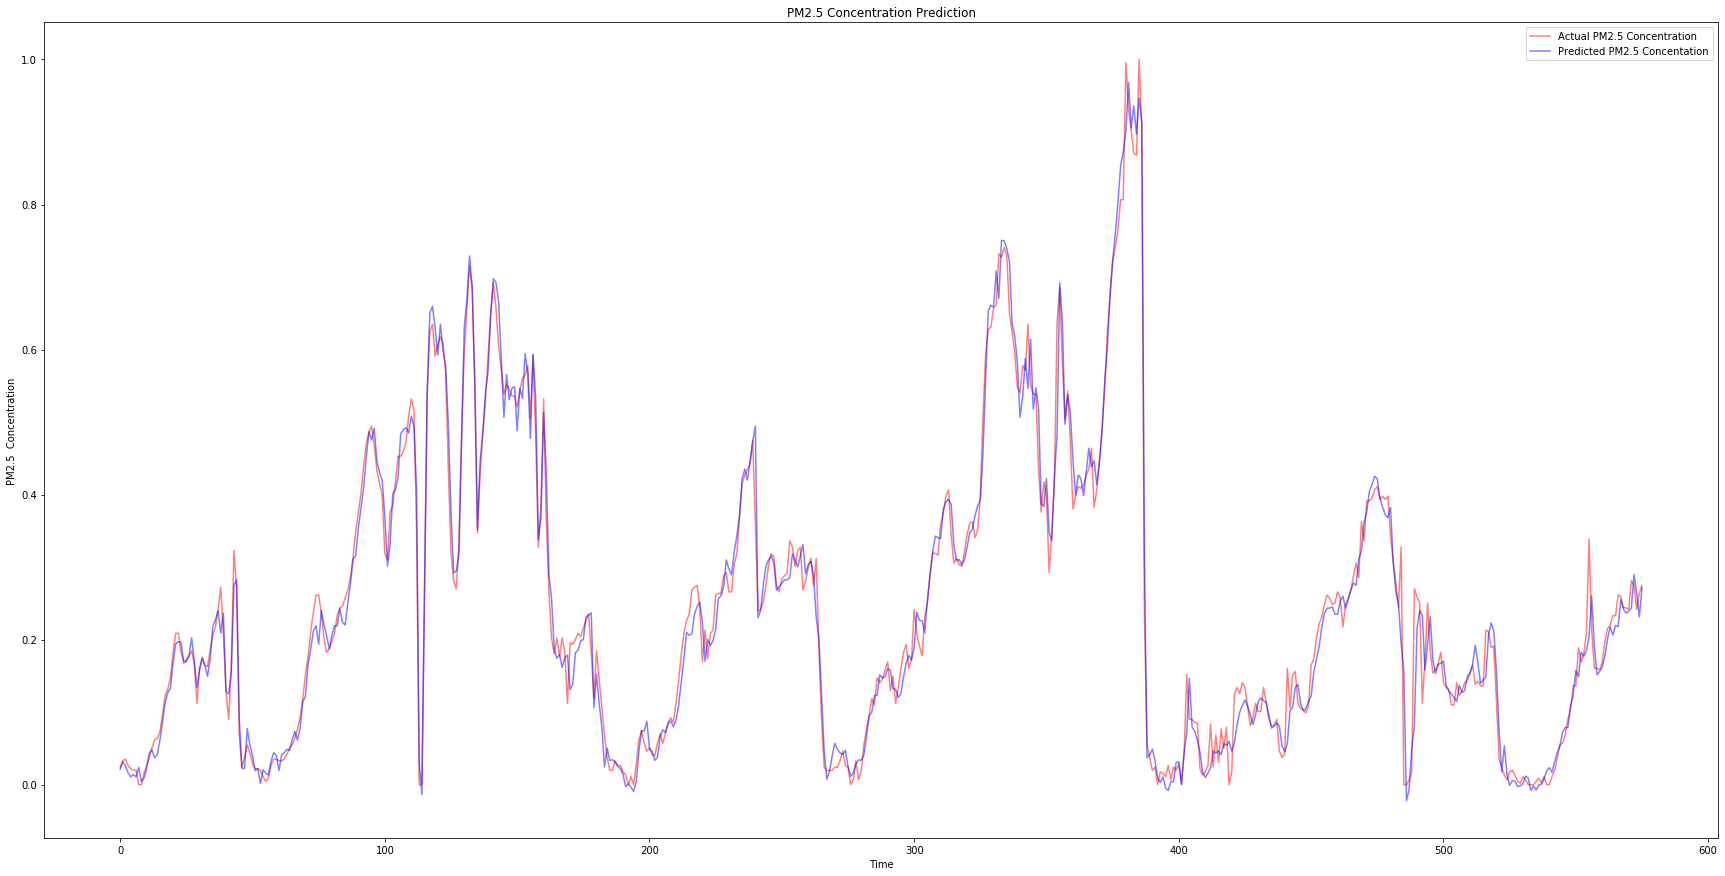

results for valid set


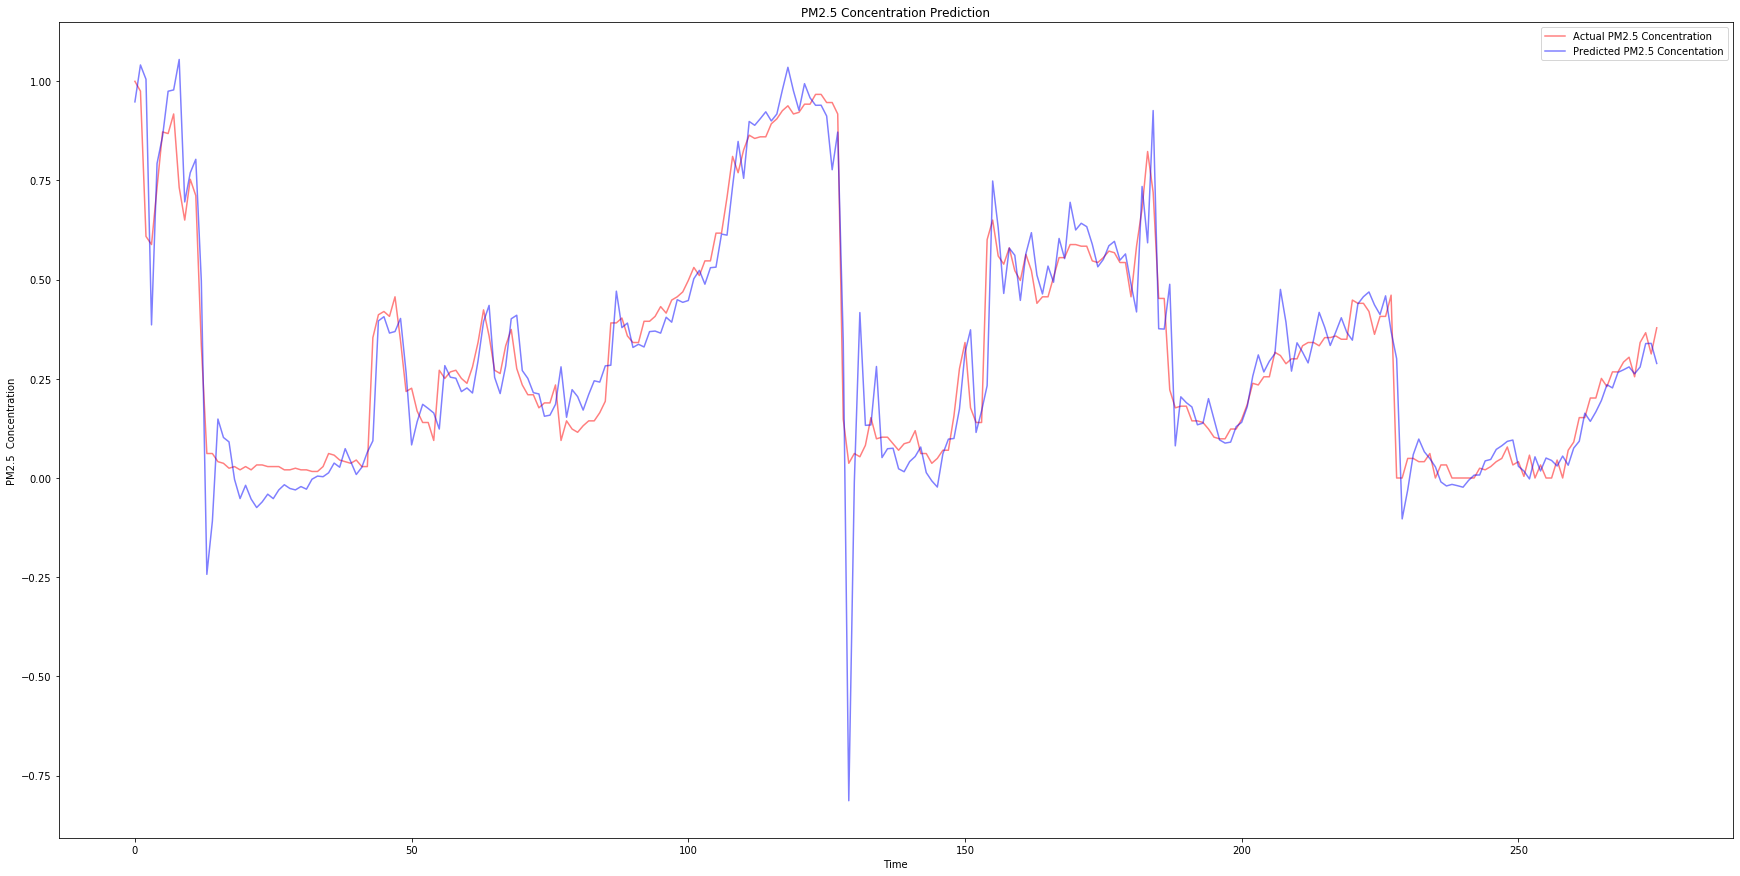

results for test set - 24 hours


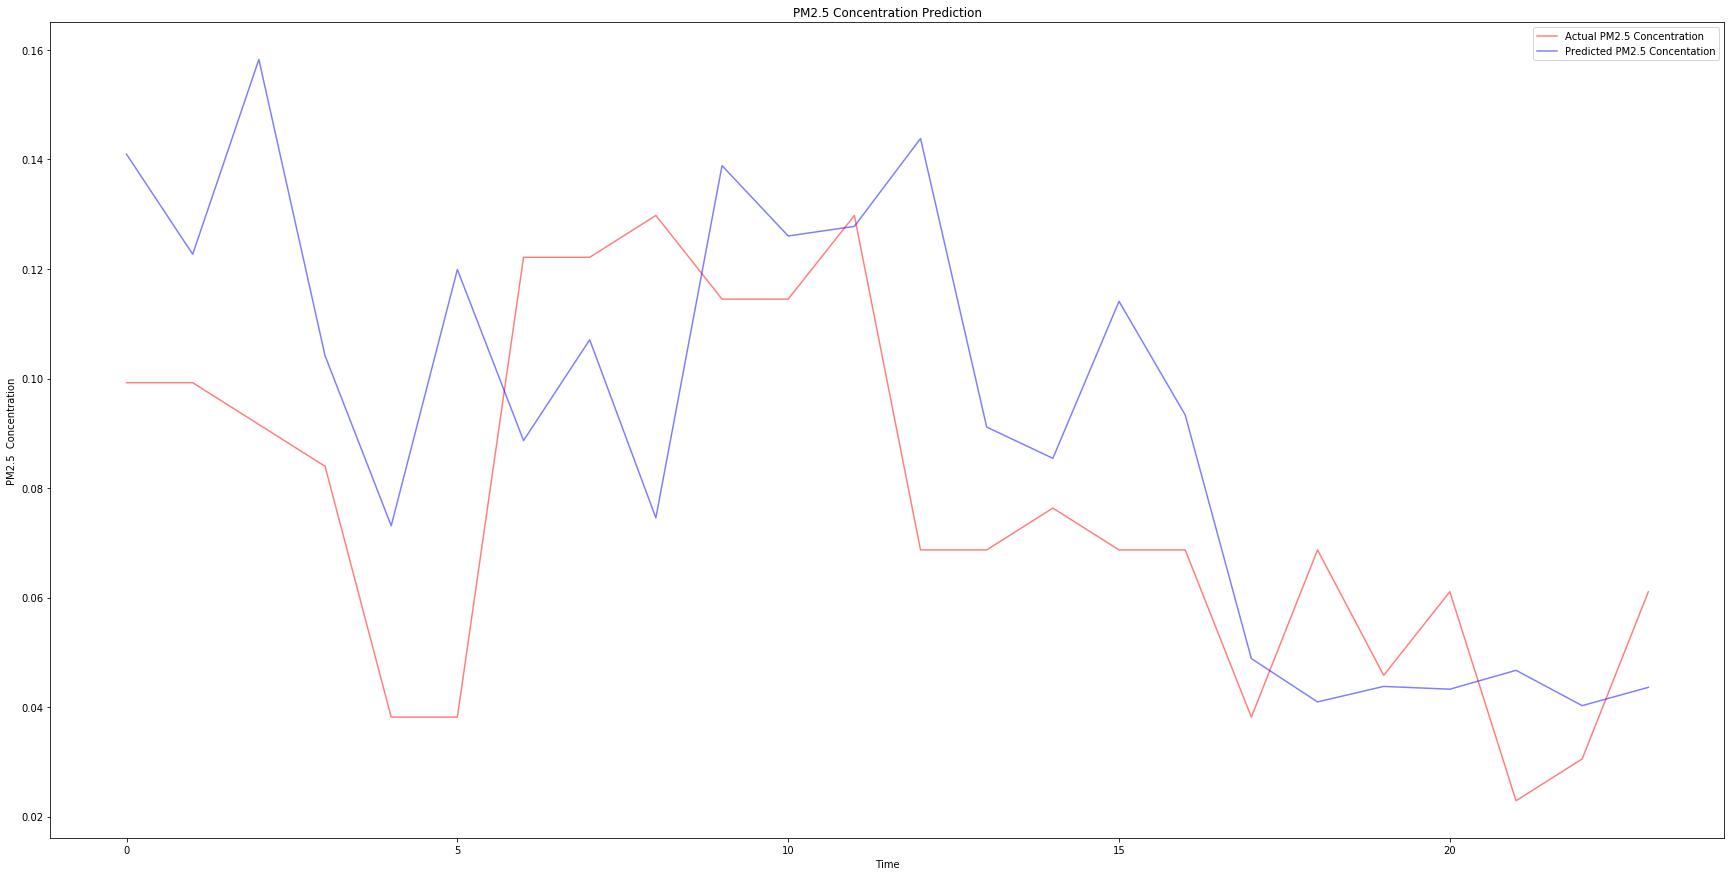

training start for LSTM_LSTM
Epoch 1/50
576/576 [==============================] - 1s 2ms/step - loss: 0.4237
Epoch 2/50
576/576 [==============================] - 0s 409us/step - loss: 0.0116
Epoch 3/50
576/576 [==============================] - 0s 397us/step - loss: 0.0080
Epoch 4/50
576/576 [==============================] - 0s 401us/step - loss: 0.0064
Epoch 5/50
576/576 [==============================] - 0s 412us/step - loss: 0.0062
Epoch 6/50
576/576 [==============================] - 0s 413us/step - loss: 0.0051
Epoch 7/50
576/576 [==============================] - 0s 410us/step - loss: 0.0052
Epoch 8/50
576/576 [==============================] - 0s 423us/step - loss: 0.0050
Epoch 9/50
576/576 [==============================] - 0s 403us/step - loss: 0.0048
Epoch 10/50
576/576 [==============================] - 0s 404us/step - loss: 0.0044
Epoch 11/50
576/576 [==============================] - 0s 403us/step - loss: 0.0037
Epoch 12/50
576/576 [==============================] - 0s 

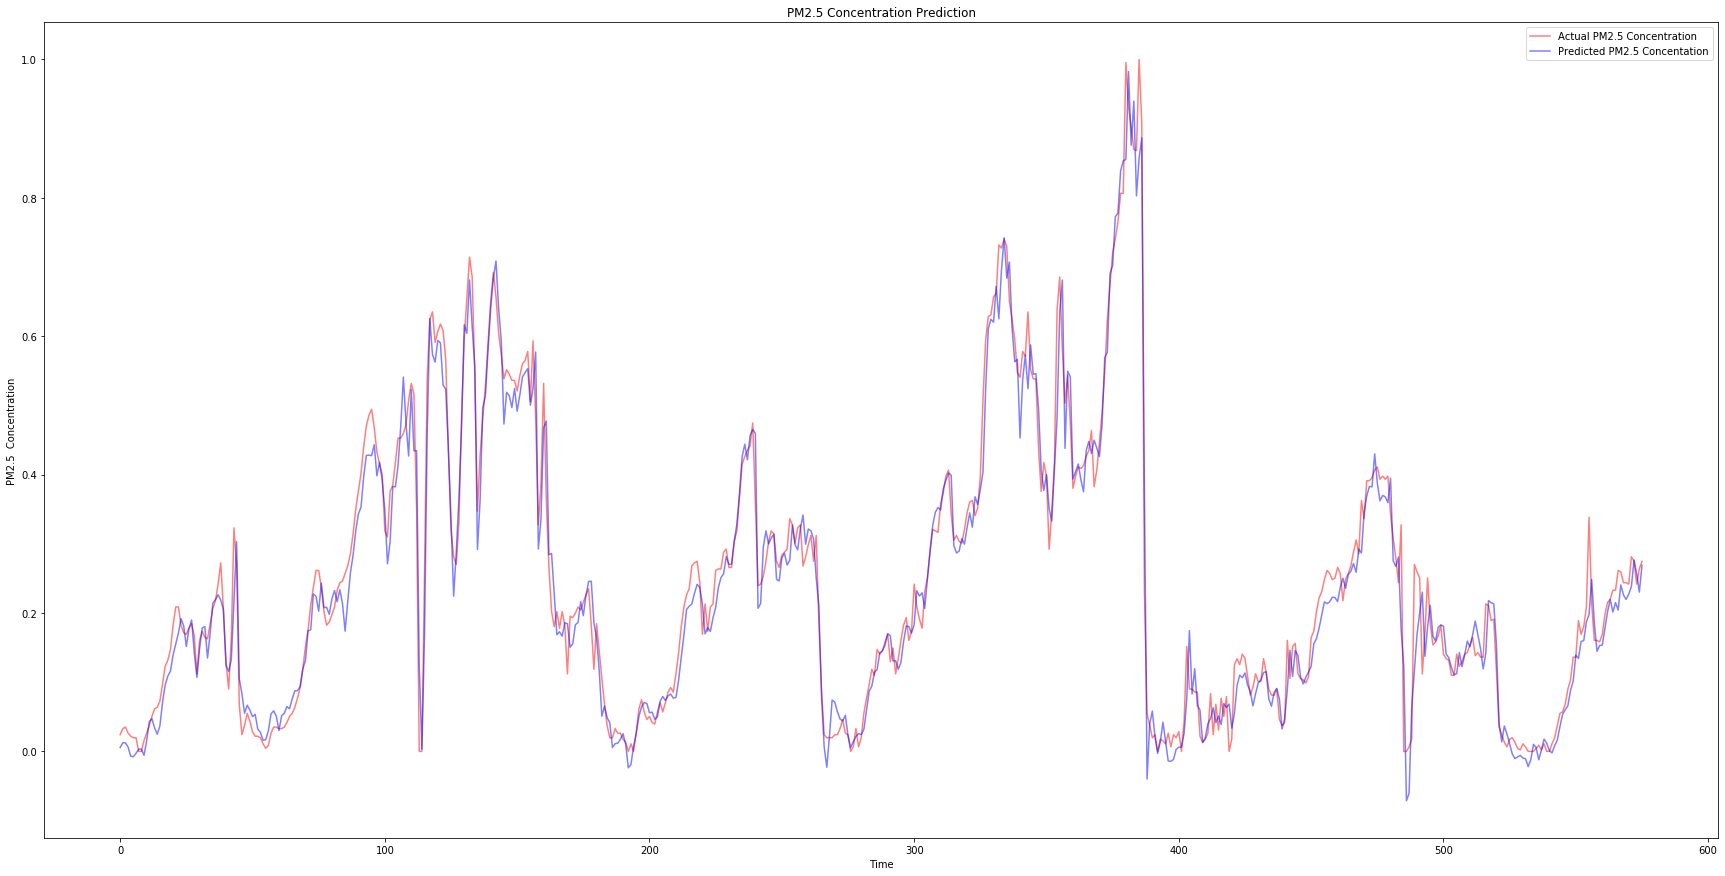

results for valid set


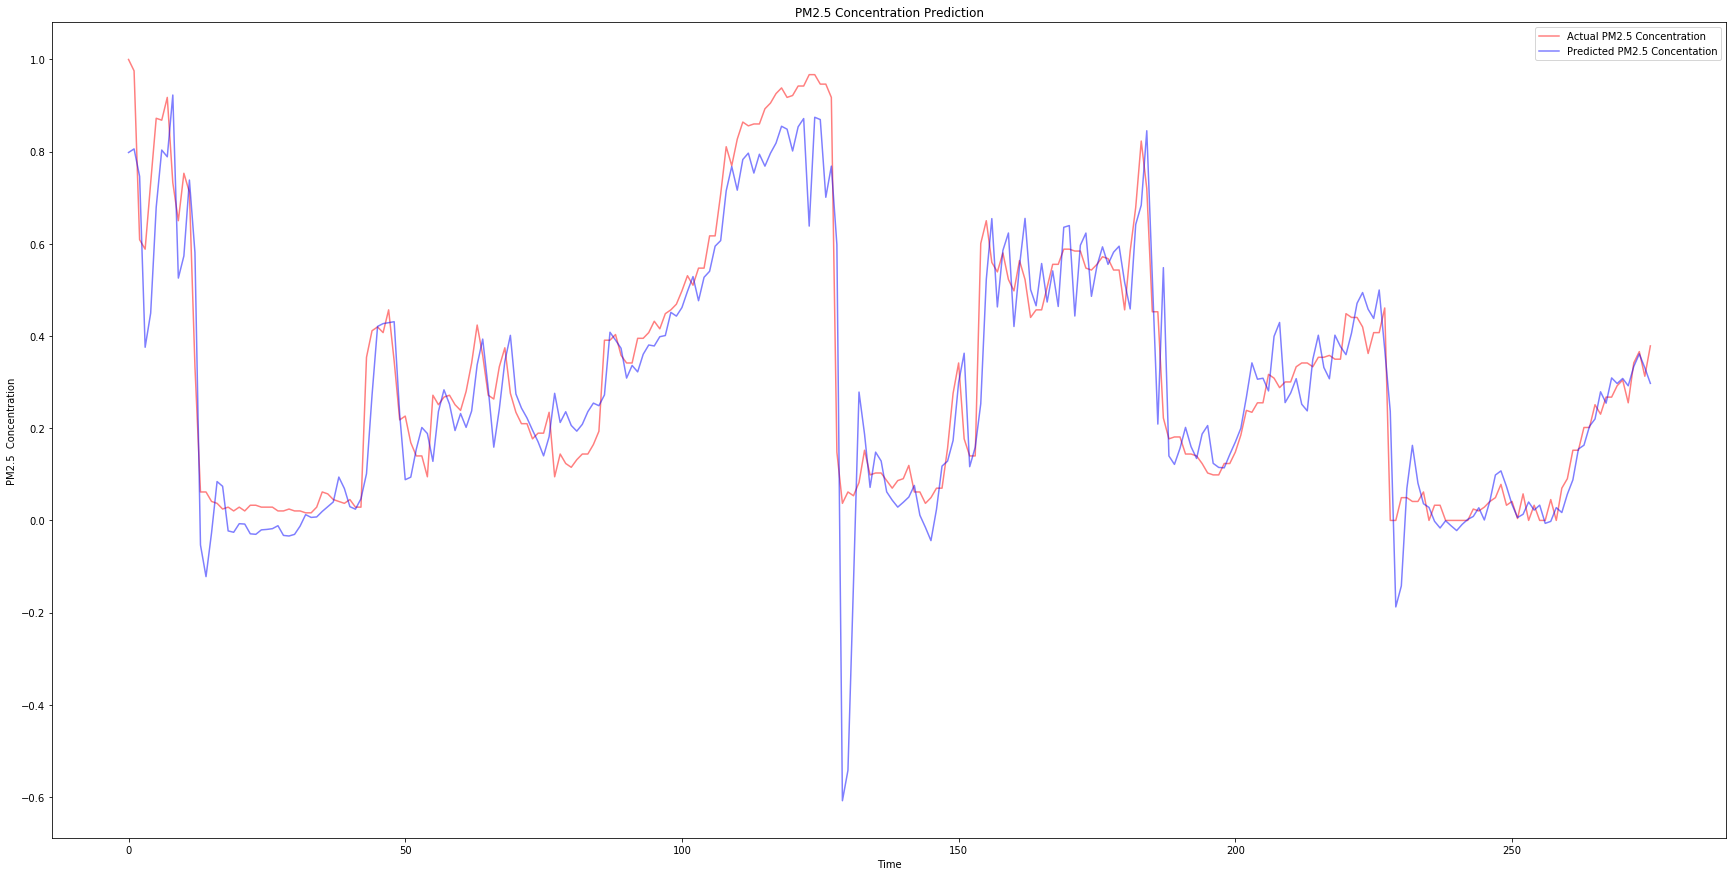

results for test set - 24 hours


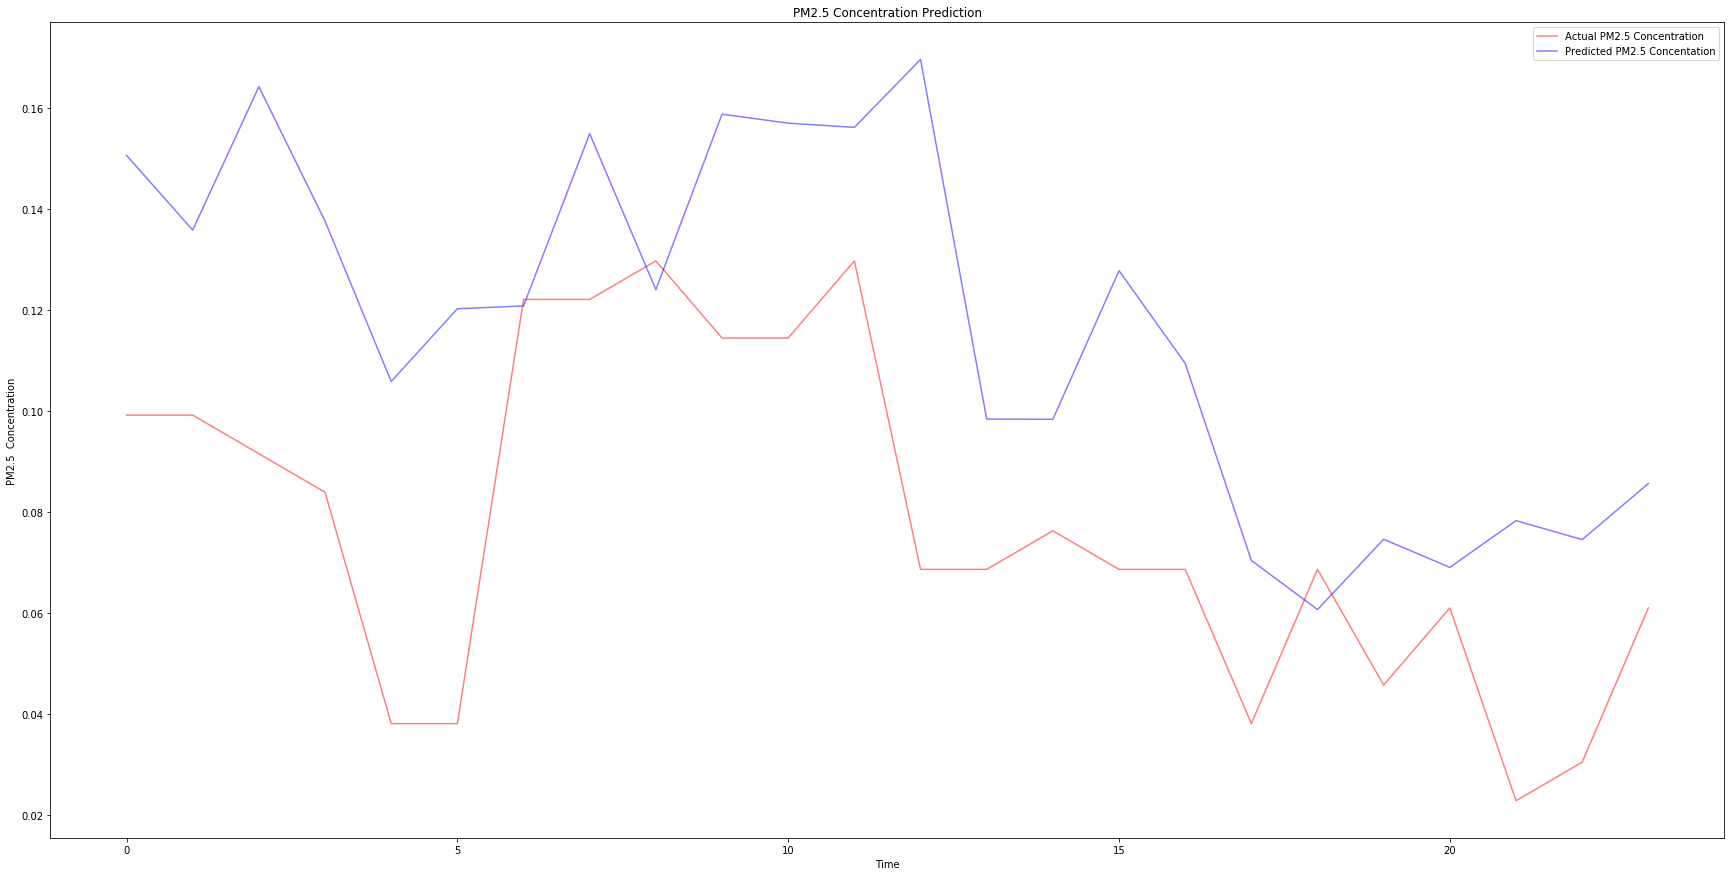

In [18]:
for model in RnnModelDict:
    regressor = RnnModelDict[model]
    
    print('training start for', model)    
    start = time.process_time()
    regressor.fit(X_train,y_train,epochs=50,batch_size=32)
    train_time = round(time.process_time() - start, 2)
    
    print('results for training set')
    y_train_pred = regressor.predict(X_train)
    plot_predictions(y_train,y_train_pred)
    train_rmse = return_rmse(y_train,y_train_pred)
    
    print('results for valid set')
    y_valid_pred = regressor.predict(X_valid)
    plot_predictions(y_valid,y_valid_pred)
    valid_rmse = return_rmse(y_valid,y_valid_pred)
    
    
    print('results for test set - 24 hours')
    y_test_pred24 = regressor.predict(X_test_24)
    plot_predictions(y_test_24,y_test_pred24)
    test24_rmse = return_rmse(y_test_24,y_test_pred24)
    
    
    one_df = pd.DataFrame([[model, train_rmse, valid_rmse, test24_rmse, train_time]], 
                          columns=['Model', 'train_rmse', 'valid_rmse', '24h_pred_rmse', 'train_time'])
    rmse_df = pd.concat([rmse_df, one_df])

# save the rmse results 
rmse_df.to_csv('../rmse_result_v3.csv')




In [394]:
X_valid[0,:,1]

array([0.62889518, 0.54390935, 0.57507082, 0.65439093, 0.5694051 ,
       0.41359773, 0.39093484, 0.41076487, 0.54107649, 0.70254958,
       0.78186969, 0.8101983 , 0.68838527, 0.69971671, 0.67988669,
       0.7223796 , 0.74220963, 0.72804533, 0.78186969, 0.78186969,
       0.94617564, 1.        , 0.898017  , 0.98866856])

In [395]:
y_valid[0]

1.0

In [370]:
y_train_origin = y_train.reshape(-1, 1)
y_train_origin = sc_y.inverse_transform(y_train_origin)


In [371]:
y_train_pred = regressor.predict(X_train)
y_train_pred_origin = sc_y.inverse_transform(y_train_pred)


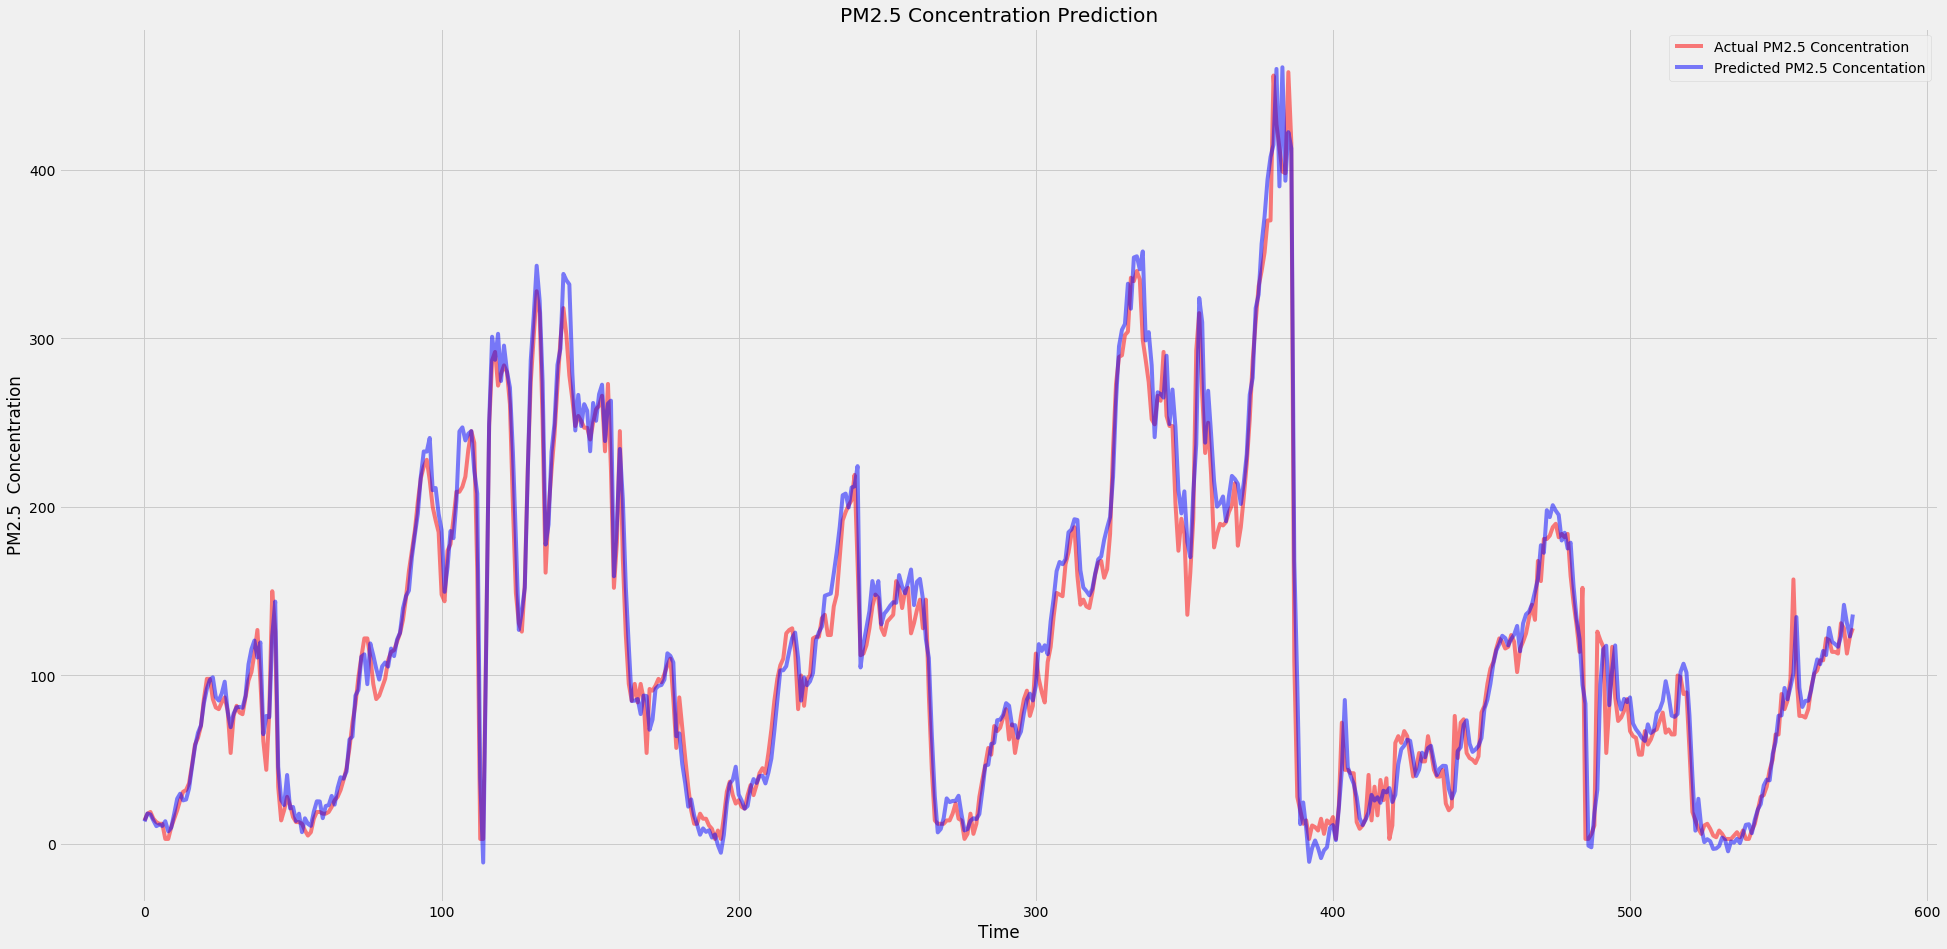

16.755857873276085

In [374]:
plot_predictions(y_train_origin,y_train_pred_origin)
return_rmse(y_train_origin,y_train_pred_origin)


(76, 24, 12)

In [270]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = dataset[len(dataset)-len(test_set) - seq_len:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(seq_len,test_size+seq_len):
    X_test.append(inputs[i-seq_len:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],12))
predicted_PM25 = LSTM_GRU_reg.predict(X_test)
predicted_PM25 = sc.inverse_transform(predicted_PM25[0])


ValueError: non-broadcastable output operand with shape (1984,1) doesn't match the broadcast shape (1984,12)

In [272]:
predicted_PM25.shape

(576, 1)